# Como as máquinas aprendem na pratica

<center>
<img src="imgs/andre-barbosa.png" width="300"/>
</center>


Esse sou eu :)

- DS @Microsoft
- Mestrando @IME-USP
- [https://www.linkedin.com/in/barbosaandre](https://www.linkedin.com/in/barbosaandre) - Só me avisa de onde você veio :)
- [abarbosa94.github.io/personal_blog](https://abarbosa94.github.io/personal_blog)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns

In [4]:
dataset = fetch_california_housing()
features = dataset['data']
label = pd.Series(dataset['target'],name='MEDV')
feature_names = dataset['feature_names']
description = dataset['DESCR']

dataset = pd.DataFrame(features, columns=feature_names)
dataset = pd.concat((dataset,label), axis=1)
dataset = dataset[dataset['MEDV']<5]

In [5]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(description)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

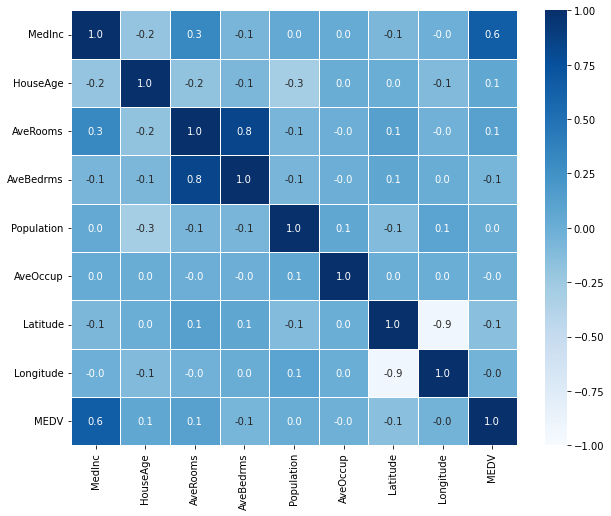

In [7]:
df_corr = dataset.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, fmt=".1f", linewidths=.5, cmap="Blues", 
            center=0, vmax=1.0, vmin=-1.0);

Como podemos, com base no que temos, prever o valor do *MEDV* para casas nunca antes vistas?

E, se num primeiro momento, só usássemos a variável que tivesse maior correlação linear?

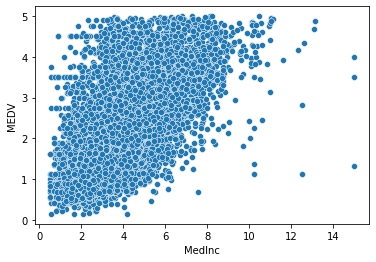

In [8]:
_ = sns.scatterplot(x=dataset['MedInc'], y=dataset['MEDV'])

# Formulando o problema

Sempre que falamos de aprendizado surpervisionado (e em alguns casos de unsurpervised) em Machine Learning, estamos falando de uma função que estamos tentando **otimizar**.  

 Quando falamos de otimização, estamos nos referindo a algo que queremos *minimizar* ou *maximizar*.

No nosso caso, vemos que existe uma forte relação **linear** entre esses dados e, então, queremos uma função $\hat{y} = f(x) = wx + b + \epsilon$, em que $\epsilon$ é o erro associado na nossa função (nunca teremos $f(x)=y$).

Em outras palavras, queremos que o valor previsto, $\hat{y}$ seja muito próximo ao valor real, $y$. Em outras palavras, queremos minimizar a diferença entre o valor previsto e o real e iremos usar uma reta, $wx +b$, para estimar esse valor :)

# Mas qual a reta perfeita?

Decidimos usar uma reta para fazer uma estimativa dos nossos dados, certo? Mas qual seriam os parametos $w$ e $b$ ideais? Lembra do que falamos no começo da aula? No caso $w$ e $b$ são os parâmetos ideais e queremos usá-los para aprender a reta. Mas como que aprendemos?

Ora, e se a gente chutasse quais são esses valores? Que tal começarmos com 0? Mas pode ser qualquer coisa!

In [10]:
x = dataset['MedInc']
y = dataset['MEDV']
w=0.0 #needs to be float
b=0.0 #needs to be float


y_hat = w*x + b

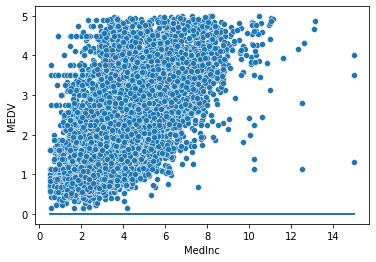

In [11]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_hat);

# A métrica de erro

Visualmente, não parece que a reta resume bem os nossos dados. Mas podemos ter alguma métrica de erro para definir isso? 

Lembrem-se que estamos falando de um problema de otimização, então podemos dizer que montar uma função de erro (também conhecida como _função de custo_, ou cost function) que deve ser **minimizada**. Em outras palavras, queremos que dados $w$ e $b$, o erro seja o menor possível.

Existem várias formas de fazer isso, mas vamos definir a seguinte:

- Calculamos a diferença entre o valor real e o predito, ou seja ($y - \hat{y}$)

- Como para alguns pontos $y \geq \hat{y}$ e $y \leq \hat{y}$ para outros, os valores podem se anular. Então elevamos tudo ao quadrado, $(y - \hat{y})^2$

- Somamos para todos os pontos e tiramos a média.

Em resumo, nosso erro é definido por:

$E = \frac{1}{n}\sum{ (y_i - \hat{y_i})^2}$, para cada $i$ do nosso dataset.

Lembrando que queremos encontrar $w$ e $b$ e $\hat{y} = wx + b$, então:

$E = \frac{1}{n}\sum{ (y_i - (wx_i+b))^2}$

Ou seja, nós elevamos os erros ao quadrado e tiramos a média, daí o nome Mean Squared Error, uma função de custo muito famosa no campo de ML.

In [12]:
#fonte: https://nbviewer.jupyter.org/github/groverpr/Machine-Learning/blob/master/notebooks/05_Loss_Functions.ipynb
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """ 
    return np.mean((true - pred)**2)

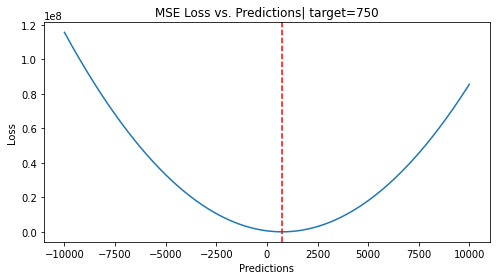

In [13]:
fig, ax1 = plt.subplots(1,1, figsize = (7,4))

# array of same target value 10000 times
target = np.repeat(750, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions| target=750")
plt.axvline(x=750, color='red', linestyle='--')

fig.tight_layout()

Acima vemos o plot de uma MSE quando o target de _um ponto_ é 750 e temos diferentes previsões que variam de $-\infty$ a $+\infty$. Podemos ver claramente que essa função tem um **mínimo** para um ponto. O que queremos é que diferença entre a previsão de *todos* os pontos e o valor *real* seja a menor possível :)

In [14]:
def predict(w, b, inputs):
    return w*inputs + b

def loss(params_dict):
    preds = predict(params_dict['w'], params_dict['b'], inputs)
    return np.mean((targets-preds)**2)

In [15]:
inputs = x.values
targets = y.values
loss({'w': w,'b': b}), w, b

(4.631528742212968, 0.0, 0.0)

No caso, a _média_ dos _erros_ com os nossos dados é de $\approx 4.6$ com base na reta que a gente escolheu. Como a gente consegue melhorar isso?

# Aprendendo a reta
Vamos chamar $w$ de peso (weights) e $b$ de bias (ou viés), para facilitar a notação. O que queremos agora, então, é desenvolver um algoritmo que aprenda o peso $w$ e o bias $b$, também conhecidos como parâmetos do nosso modelo

Para ilustrar, vamos tentar imaginar o seguinte exemplo:


- Você está no topo de uma montanha e quer chegar no fundo dela o mais rápido possível e você não sabe muito bem como chegar


- Você, então, procura o caminho que tê dá a maior inclinação e você vai andando passo a passo


- Então, você dá passos largos se para descer a inclinação for pouco íngrime e passos mais estreitos se for menos íngrime

![](imgs/gradient-descent-meme.jpeg)

Vamos chamar cada "passo" de época e a intensidade desse passo, de learning rate $L$.

O que queremos então, é partir de um ponto arbitrário de w e b e fazer "correções" nos seus valores, um passo de cada vez, até que o valor da nossa função de custo seja a menor possível.

# Como corrigir?

É aqui que está a sacada da coisa e o que chamamos de aprendizado!


Queremos alterar o nosso **w**, por exemplo, de forma que o *erro* (nossa função) seja reduzida.

Em outras palavras _queremos descobrir uma variável_ de forma que, **fixado todo o resto**, se _alterarmos_ o seu valor, estaremos reduzindo o erro.

Qual é o nome dessa variável?

    a) A integral de w


    b) A derivada parcial do erro em relação a w


    c) A integral parcial de w em relação ao erro


    d) A derivada de w
    


Se você respondeu a alternativa $b$, você acertou! Essa é _exatamente_ a definição de derivada parcial :) 

Vamos inlustrar com um exemplo

Quando falamos de derivadas o que estamos tentando ver em, por exemplo, $\frac{df}{dx}$, como uma pequena mudança em $x$ altera o valor de $f$. O $d$ pode até ser interpretado como $\Delta$ se ajudar a lembrar!

Mas lembrem-se que não queremos as derivadas parciais só de $w$, mas de $w$ e $b$!

Como queremos calcular alterar os valores de w e b de forma a minimizar o erro, nós queremos as derivadas parciais da função de erro em relação a $w$ e as derivadas parciais da função de erro em relação a $b$. Qual o nome que damos para esse processo?

    a) Integral de uma função


    b) Derivadas de uma função

    c) Gradiente de uma função

    d) Leite de uma função

A grande sacada aqui, é que o **gradiente** de uma função (no nosso caso, a função de erro), é a _coleção de todas as derivadas parciais em um vetor_. Ou seja, a cada passo, nós calculamos o gradiente da nossa função de custo e "corrigimos" o w e o b de forma a minimizar a função de erro.

Na prática o que estamos fazendo é isso:

<center><img src='imgs/downhill.gif'></center>

Ou isso, colocando em mais matematiquês


<center>
<img src="imgs/derivatives-ml.png" width="800" height="800"/>
</center>

Mas quem quiser, [aqui](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction); [aqui](https://pt.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives), [aqui](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) e [aqui](https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82#targetText=For%20supervised%20learning%2C%20models%20are,coefficients%20that%20minimize%20cost%20function.&targetText=The%20most%20commonly%20used%20loss,function%20is%20a%20parabola%20curve) tem ótimas referências

# Mas precisamos saber as derivada tudo?

<center><img src='imgs/sad-cat.gif'></center>

Na teoria sim, mas na prática **não** :)

E como esse é um curso prático, vamos deixar o computador fazer isso pra gente!

<center><img src='imgs/tricky-guy.gif'></center>

In [13]:
#!pip install --upgrade jax jaxlib 

In [14]:
from jax import grad

gradients = grad(loss)({'w': w, 'b': b})

In [15]:
gradients

{'b': DeviceArray(-3.8411067, dtype=float32, weak_type=True),
 'w': DeviceArray(-16.09417, dtype=float32, weak_type=True)}

In [16]:
gradients['w'], gradients['b']

(DeviceArray(-16.09417, dtype=float32, weak_type=True),
 DeviceArray(-3.8411067, dtype=float32, weak_type=True))

In [17]:
L = 5e-3
w = w - L*gradients['w'] # subtraimos pq estamos querendo minimizar)
b = b - L*gradients['b'] # subtraimos pq estamos querendo minimizar)

w = w.copy() #retorna um array do numpy
b = b.copy()

O $L$, aqui, quer dizer uma *intensidade* que queremos que as nossas alterações ocorram. Os gradientes definem a direção para a gente fazer o ajuste de forma a minimizar o erro, mas quem controla a intensidade é o $L$.

In [18]:
y_hat = w*x + b

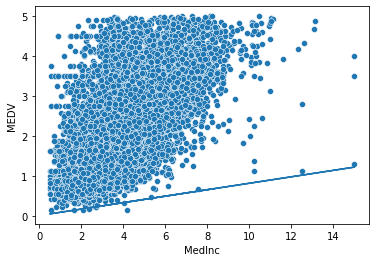

In [19]:
sns.scatterplot(x=x,y=y)
plt.plot(x, y_hat);

In [20]:
loss({'w': w,'b': b})

3.377875919526081

Nessa primeira rodada conseguimos fazer um ajuste da nossa reta e o nosso erro deu uma reduzida. O ideal é que rodemos esse algoritmos por um número $n$ de vezes, chamado épocas (ou epochs) e que ao final desse processo, tenha ocorrido uma convergência.

In [22]:
from tqdm.notebook import tqdm
L = 1e-5 # Vamos repetir varias vezes entao é melhor reduzir a intensidade
epochs = 5000  # The number of iterations to perform gradient descent

for i in tqdm(range(epochs)):
    gradients = grad(loss)({'w': w, 'b': b})
    w = w - L*gradients['w'] 
    b = b - L*gradients['b'] 
    w = w.copy()
    b = b.copy()

  0%|          | 0/5000 [00:00<?, ?it/s]

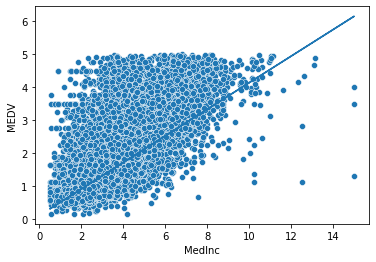

In [23]:
y_hat = w*x + b
sns.scatterplot(x=x, y=y)
plt.plot(x, y_hat);

In [24]:
loss({'w': w,'b': b})

0.6627135243817026

Conseguimos! Teoricamente encontramos o menor erro possível da nossa função! Essa técnica de otimização é conhecida como Gradiente Descendente (Gradient Descent) e é muito comum utilizá-la para otimizar diferentes modelos ! Principalmente quando temos um volume de dados muito grande :)

Mas podemos levantar uma série de dúvidas agora:


- Como escolher a epoch e o learning rate (Aula de Tuning!)


- Como saber se o modelo é bom? (Próximo bloco de estudos vai aprofundar isso :))


- Fizemos tudo certo?

- Podemos fazer de uma forma mais eficiente?

Como já comentado no artigo Learning > Machines, o que fizemos é a famosa a _regressão linear_! Contudo, a regressão linear tem algumas premissas que serão aprofundadas no bloco de estudos, mas vamos apenas citar apenas uma delas:

    - O valor esperado (a média da população) dos erros é zero
    
 Podemos validar isso rapidamente:

In [25]:
(y - y_hat).mean().round(4)

0.3378

<center><img src='imgs/wait-wat.gif'></center>

# Fizemos algo de Errado?



Não! 


A idéia por trás do Gradiente Descendente é que ele nos dá uma solução *aproximada* da ideal, uma vez que ele é um método *iterativo*. Ele _pode_ convergir para a solução ideal, dependendo dos nossos hiperparâmetos (parâmetros que não são aprendidos). As vezes _queremos_ uma solução _aproximada_ porquê é _impossível_ computar a ideal.

No caso **específico** da regressão linear, ela pode ser calculada analíticamente. Ou seja, é provado que dá pra obter a reta por meio de uma equação chamada _método dos mínimos quadrados (MMS)_. Mas isso é papo pro bloco de estudos :)

Mas vamos dar uma _prévia disso com um pouco do scikit-learn_ e **a magia do fit e predict**

![](imgs/machine-learning-meme.png)

In [26]:
x_reshaped = x.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(x_reshaped, y)

LinearRegression()

In [28]:
w,b

(array(0.4034912, dtype=float32), array(0.09938933, dtype=float32))

In [29]:
lr.intercept_, lr.coef_

(0.4504714514861494, array([0.39986878]))

In [30]:
(y - lr.predict(x.values.reshape(-1,1))).mean().round(4)

0.0

Então essa reta, que o scikit encontrou é a perfeita :)

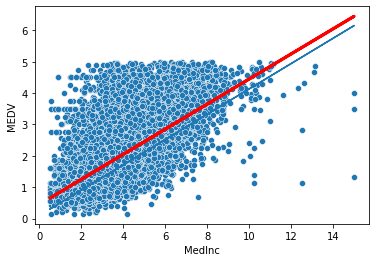

In [31]:
sns.scatterplot(x=x, y=y)
plt.plot(x, lr.predict(x_reshaped), color="r", lw=3)
plt.plot(x, y_hat);

In [32]:
loss({'w': w,'b': b})

0.6627135243817026

In [33]:
loss({'w': lr.coef_,'b': lr.intercept_})

0.5485962279736202

![](imgs/ta-da.gif)